# BeautifulSoup Tutorial

Tutorial follows [Keith Galli's YouTube tutorial](https://www.youtube.com/watch?v=GjKQ6V_ViQE)<br>
[BeautifulSoup documentation](https://beautiful-soup-4.readthedocs.io/en/latest/)

## The basics

1. Importing libraries
2. Loading the html

In [1]:
# load libraries
import requests
import re
from bs4 import BeautifulSoup as bs

import pandas as pd

from IPython.display import Image, display

In [2]:
# load webpage content
r = requests.get("https://keithgalli.github.io/web-scraping/example.html")

# convert to BeautifulSoup object
soup = bs(r.content)

# print html
print(soup.prettify())

<html>
 <head>
  <title>
   HTML Example
  </title>
 </head>
 <body>
  <div align="middle">
   <h1>
    HTML Webpage
   </h1>
   <p>
    Link to more interesting example:
    <a href="https://keithgalli.github.io/web-scraping/webpage.html">
     keithgalli.github.io/web-scraping/webpage.html
    </a>
   </p>
  </div>
  <h2>
   A Header
  </h2>
  <p>
   <i>
    Some italicized text
   </i>
  </p>
  <h2>
   Another header
  </h2>
  <p id="paragraph-id">
   <b>
    Some bold text
   </b>
  </p>
 </body>
</html>



## find and find_all

The most useful functions in BeautifulSoup!

In [3]:
# finds first element specified
first_header = soup.find("h2")
print(first_header)

<h2>A Header</h2>


In [4]:
# finds all instances of specified element
headers = soup.find_all("h2")
print(headers)

[<h2>A Header</h2>, <h2>Another header</h2>]


In [5]:
# pass in a list of elements to look for
first_header = soup.find(["h1", "h2"])
print(first_header, '\n')
headers = soup.find_all(['h1', 'h2'])
print(headers)

<h1>HTML Webpage</h1> 

[<h1>HTML Webpage</h1>, <h2>A Header</h2>, <h2>Another header</h2>]


In [6]:
# pass in attributes to find/find_all functions
paragraph = soup.find_all('p')
print(paragraph, '\n')
paragraph = soup.find_all('p', attrs={'id': 'paragraph-id'})
print(paragraph)

[<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>, <p><i>Some italicized text</i></p>, <p id="paragraph-id"><b>Some bold text</b></p>] 

[<p id="paragraph-id"><b>Some bold text</b></p>]


In [7]:
# nested specifications
body = soup.find('body')
div = body.find('div')
header = div.find('h1')
print(body, '\n')
print(div, '\n')
print(header)

<body>
<div align="middle">
<h1>HTML Webpage</h1>
<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>
</div>
<h2>A Header</h2>
<p><i>Some italicized text</i></p>
<h2>Another header</h2>
<p id="paragraph-id"><b>Some bold text</b></p>
</body> 

<div align="middle">
<h1>HTML Webpage</h1>
<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>
</div> 

<h1>HTML Webpage</h1>


In [8]:
# search for specific strings
some_paragraphs = soup.find_all('p', string="Some bold text") # only returns exact string matches
print(some_paragraphs, '\n')
some_paragraphs = soup.find_all('p', string=re.compile("Some")) # returns all instances with word
print(some_paragraphs, '\n')
headers = soup.find_all('h2', string=re.compile("(H|h)eader"))
print(headers)

[<p id="paragraph-id"><b>Some bold text</b></p>] 

[<p><i>Some italicized text</i></p>, <p id="paragraph-id"><b>Some bold text</b></p>] 

[<h2>A Header</h2>, <h2>Another header</h2>]


## select (CSS selector)

[CSS Selector reference page](https://www.w3schools.com/cssref/css_selectors.asp)

In [9]:
print(soup.body.prettify())

<body>
 <div align="middle">
  <h1>
   HTML Webpage
  </h1>
  <p>
   Link to more interesting example:
   <a href="https://keithgalli.github.io/web-scraping/webpage.html">
    keithgalli.github.io/web-scraping/webpage.html
   </a>
  </p>
 </div>
 <h2>
  A Header
 </h2>
 <p>
  <i>
   Some italicized text
  </i>
 </p>
 <h2>
  Another header
 </h2>
 <p id="paragraph-id">
  <b>
   Some bold text
  </b>
 </p>
</body>



In [10]:
# another way to nested select
    # selects p elements inside of divs
content = soup.select('div p')
print(content)

[<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>]


In [11]:
# get p elements directly after h2
paragraphs = soup.select("h2 ~ p")
print(paragraphs)

[<p><i>Some italicized text</i></p>, <p id="paragraph-id"><b>Some bold text</b></p>]


In [12]:
# get b elements within p's with id paragraph-id
bold_text = soup.select("p#paragraph-id b")
print(bold_text)

[<b>Some bold text</b>]


In [13]:
# select all p elements where body is the parent element
paragraphs = soup.select('body > p')
print(paragraphs, '\n')

# select elements within for loop
for paragraph in paragraphs:
    print(paragraph.select('i'))

[<p><i>Some italicized text</i></p>, <p id="paragraph-id"><b>Some bold text</b></p>] 

[<i>Some italicized text</i>]
[]


In [14]:
# select by attribute
print(soup.select('[align]'), '\n')
# select by attribute with specific value
print(soup.select('[align=middle]'))

[<div align="middle">
<h1>HTML Webpage</h1>
<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>
</div>] 

[<div align="middle">
<h1>HTML Webpage</h1>
<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>
</div>]


## Getting different HTML properties

In [15]:
# print text only with .string
header = soup.find('h2')
print(header)
print(header.string)

<h2>A Header</h2>
A Header


In [16]:
# .string cannot parse ambiguous string selection (header or paragraph?)
div = soup.find('div')
print(div.prettify())
print(div.string) # returns none

# use get_text for multiple child elements
print(div.get_text())

<div align="middle">
 <h1>
  HTML Webpage
 </h1>
 <p>
  Link to more interesting example:
  <a href="https://keithgalli.github.io/web-scraping/webpage.html">
   keithgalli.github.io/web-scraping/webpage.html
  </a>
 </p>
</div>

None

HTML Webpage
Link to more interesting example: keithgalli.github.io/web-scraping/webpage.html



In [17]:
# get specific property from element
link = soup.find('a')
print(link['href'])

paragraphs = soup.select('p#paragraph-id')
print(paragraphs[0]['id'])

https://keithgalli.github.io/web-scraping/webpage.html
paragraph-id


## Code navigation

1. Path syntax
2. Parent, sibling, child

In [18]:
print(soup.prettify(), '\n')
# path syntax
print(soup.body.div.h1.string)

<html>
 <head>
  <title>
   HTML Example
  </title>
 </head>
 <body>
  <div align="middle">
   <h1>
    HTML Webpage
   </h1>
   <p>
    Link to more interesting example:
    <a href="https://keithgalli.github.io/web-scraping/webpage.html">
     keithgalli.github.io/web-scraping/webpage.html
    </a>
   </p>
  </div>
  <h2>
   A Header
  </h2>
  <p>
   <i>
    Some italicized text
   </i>
  </p>
  <h2>
   Another header
  </h2>
  <p id="paragraph-id">
   <b>
    Some bold text
   </b>
  </p>
 </body>
</html>
 

HTML Webpage


In [19]:
# know terms: parent, sibling, child
# parents directly contain child elements (parents are "one level up")
# siblins are on the same level

div_siblings = soup.body.find('div').find_next_siblings()
print(div_siblings)
for sibling in div_siblings:
    print(sibling.string)

[<h2>A Header</h2>, <p><i>Some italicized text</i></p>, <h2>Another header</h2>, <p id="paragraph-id"><b>Some bold text</b></p>]
A Header
Some italicized text
Another header
Some bold text


## Exercises!

1. Grab all of the social links from the webpage
2. Scrape the table on the webpage
3. Grab all fun facts that contain "is"
4. Download an image
5. Scrape the secret message!

In [20]:
r = requests.get("https://keithgalli.github.io/web-scraping/webpage.html")
soup = bs(r.content)
print(soup.prettify())

<html>
 <head>
  <title>
   Keith Galli's Page
  </title>
  <style>
   table {
    border-collapse: collapse;
  }
  th {
    padding:5px;
  }
  td {
    border: 1px solid #ddd;
    padding: 5px;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  th {
    padding-top: 12px;
    padding-bottom: 12px;
    text-align: left;
    background-color: #add8e6;
    color: black;
  }
  .block {
  width: 100px;
  /*float: left;*/
    display: inline-block;
    zoom: 1;
  }
  .column {
  float: left;
  height: 200px;
  /*width: 33.33%;*/
  padding: 5px;
  }

  .row::after {
    content: "";
    clear: both;
    display: table;
  }
  </style>
 </head>
 <body>
  <h1>
   Welcome to my page!
  </h1>
  <img src="./images/selfie1.jpg" width="300px"/>
  <h2>
   About me
  </h2>
  <p>
   Hi, my name is Keith and I am a YouTuber who focuses on content related to programming, data science, and machine learning!
  </p>
  <p>
   Here is a link to my channel:
   <a href="https://www.youtube.com/kgmi

In [21]:
# first links method
links = [link.a['href'] for link in soup.body.find_all('li', attrs={"class": re.compile("social")})]
print(links)

['https://www.instagram.com/keithgalli/', 'https://twitter.com/keithgalli', 'https://www.linkedin.com/in/keithgalli/', 'https://www.tiktok.com/@keithgalli']


In [22]:
# first links tutorial method
links = [link['href'] for link in soup.find('ul', attrs={"class": "socials"}).find_all('a')]
print(links)

['https://www.instagram.com/keithgalli/', 'https://twitter.com/keithgalli', 'https://www.linkedin.com/in/keithgalli/', 'https://www.tiktok.com/@keithgalli']


In [23]:
# second links method (agrees with tutorial method)
links = [link['href'] for link in soup.body.select('ul.socials a')]
print(links)

['https://www.instagram.com/keithgalli/', 'https://twitter.com/keithgalli', 'https://www.linkedin.com/in/keithgalli/', 'https://www.tiktok.com/@keithgalli']


In [24]:
# scrape table from webpage
table = pd.read_html("https://keithgalli.github.io/web-scraping/webpage.html")[0]
table.head()

S                        Team    League    GP    G     A    TP   PIM  \
0  2014-15  MIT (Mass. Inst. of Tech.)   ACHA II  17.0  3.0   9.0  12.0  20.0   
1  2015-16  MIT (Mass. Inst. of Tech.)   ACHA II   9.0  1.0   1.0   2.0   2.0   
2  2016-17  MIT (Mass. Inst. of Tech.)   ACHA II  12.0  5.0   5.0  10.0   8.0   
3  2017-18                Did not play       NaN   NaN  NaN   NaN   NaN   NaN   
4  2018-19  MIT (Mass. Inst. of Tech.)  ACHA III   8.0  5.0  10.0  15.0   8.0   

   +/- Unnamed: 9  POST  GP.1  G.1  A.1  TP.1  PIM.1  +/-.1  
0  NaN          |   NaN   NaN  NaN  NaN   NaN    NaN    NaN  
1  NaN          |   NaN   NaN  NaN  NaN   NaN    NaN    NaN  
2  0.0          |   NaN   NaN  NaN  NaN   NaN    NaN    NaN  
3  NaN          |   NaN   NaN  NaN  NaN   NaN    NaN    NaN  
4  NaN          |   NaN   NaN  NaN  NaN   NaN    NaN    NaN

In [25]:
# get all fun facts with 'is'
%time
facts = soup.select('ul.fun-facts li')
facts = [fact.text for fact in facts if ' is ' in fact.text]
print(facts)

CPU times: total: 0 ns
Wall time: 0 ns
['Middle name is Ronald', 'Dunkin Donuts coffee is better than Starbucks', "A favorite book series of mine is Ender's Game", 'Current video game of choice is Rocket League', "The band that I've seen the most times live is the Zac Brown Band"]


In [26]:
# same as above with regex and get methods
%time
facts = soup.select('ul.fun-facts li')
facts = [fact.find(string=re.compile(' is ')) for fact in facts]
facts = [fact.find_parent().get_text() for fact in facts if fact]
print(facts)

CPU times: total: 0 ns
Wall time: 0 ns
['Middle name is Ronald', 'Dunkin Donuts coffee is better than Starbucks', "A favorite book series of mine is Ender's Game", 'Current video game of choice is Rocket League', "The band that I've seen the most times live is the Zac Brown Band"]


['images/italy/lake_como.jpg', 'images/italy/pontevecchio.jpg', 'images/italy/riomaggiore.jpg']


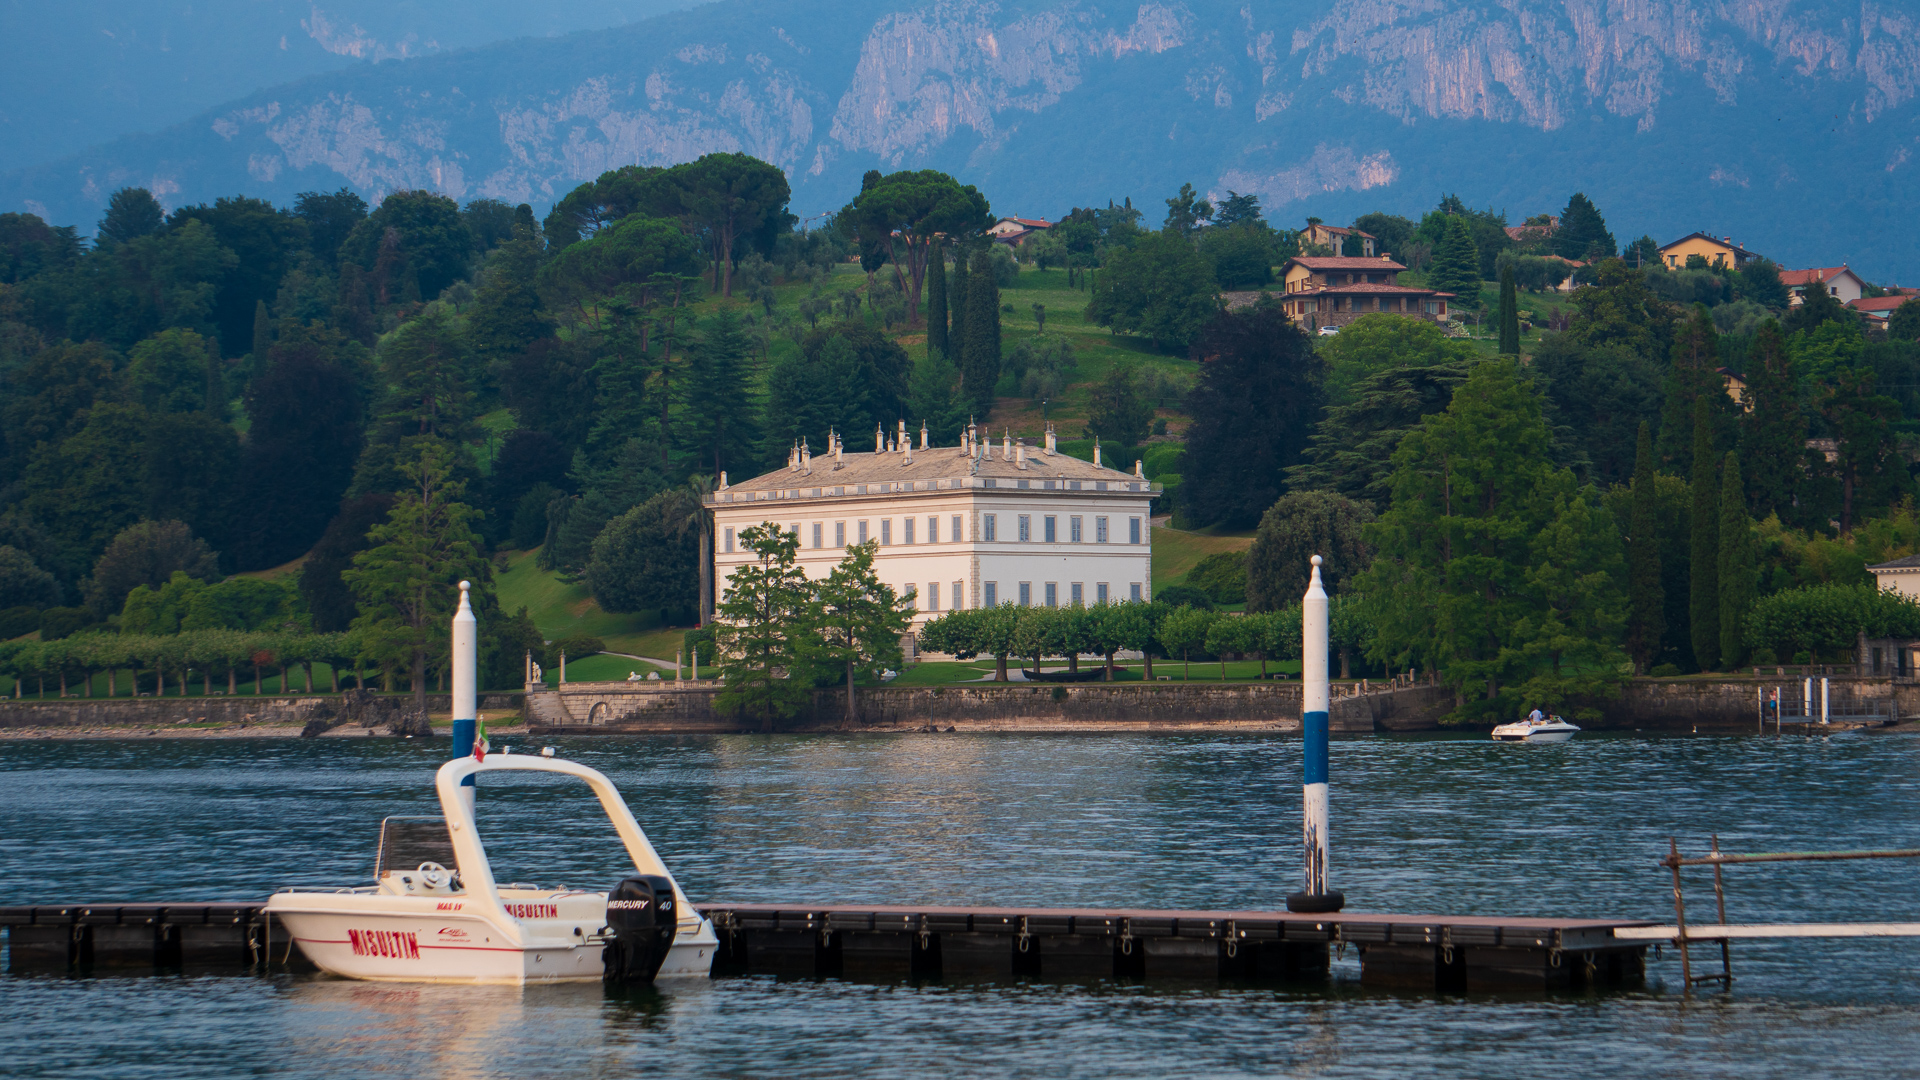

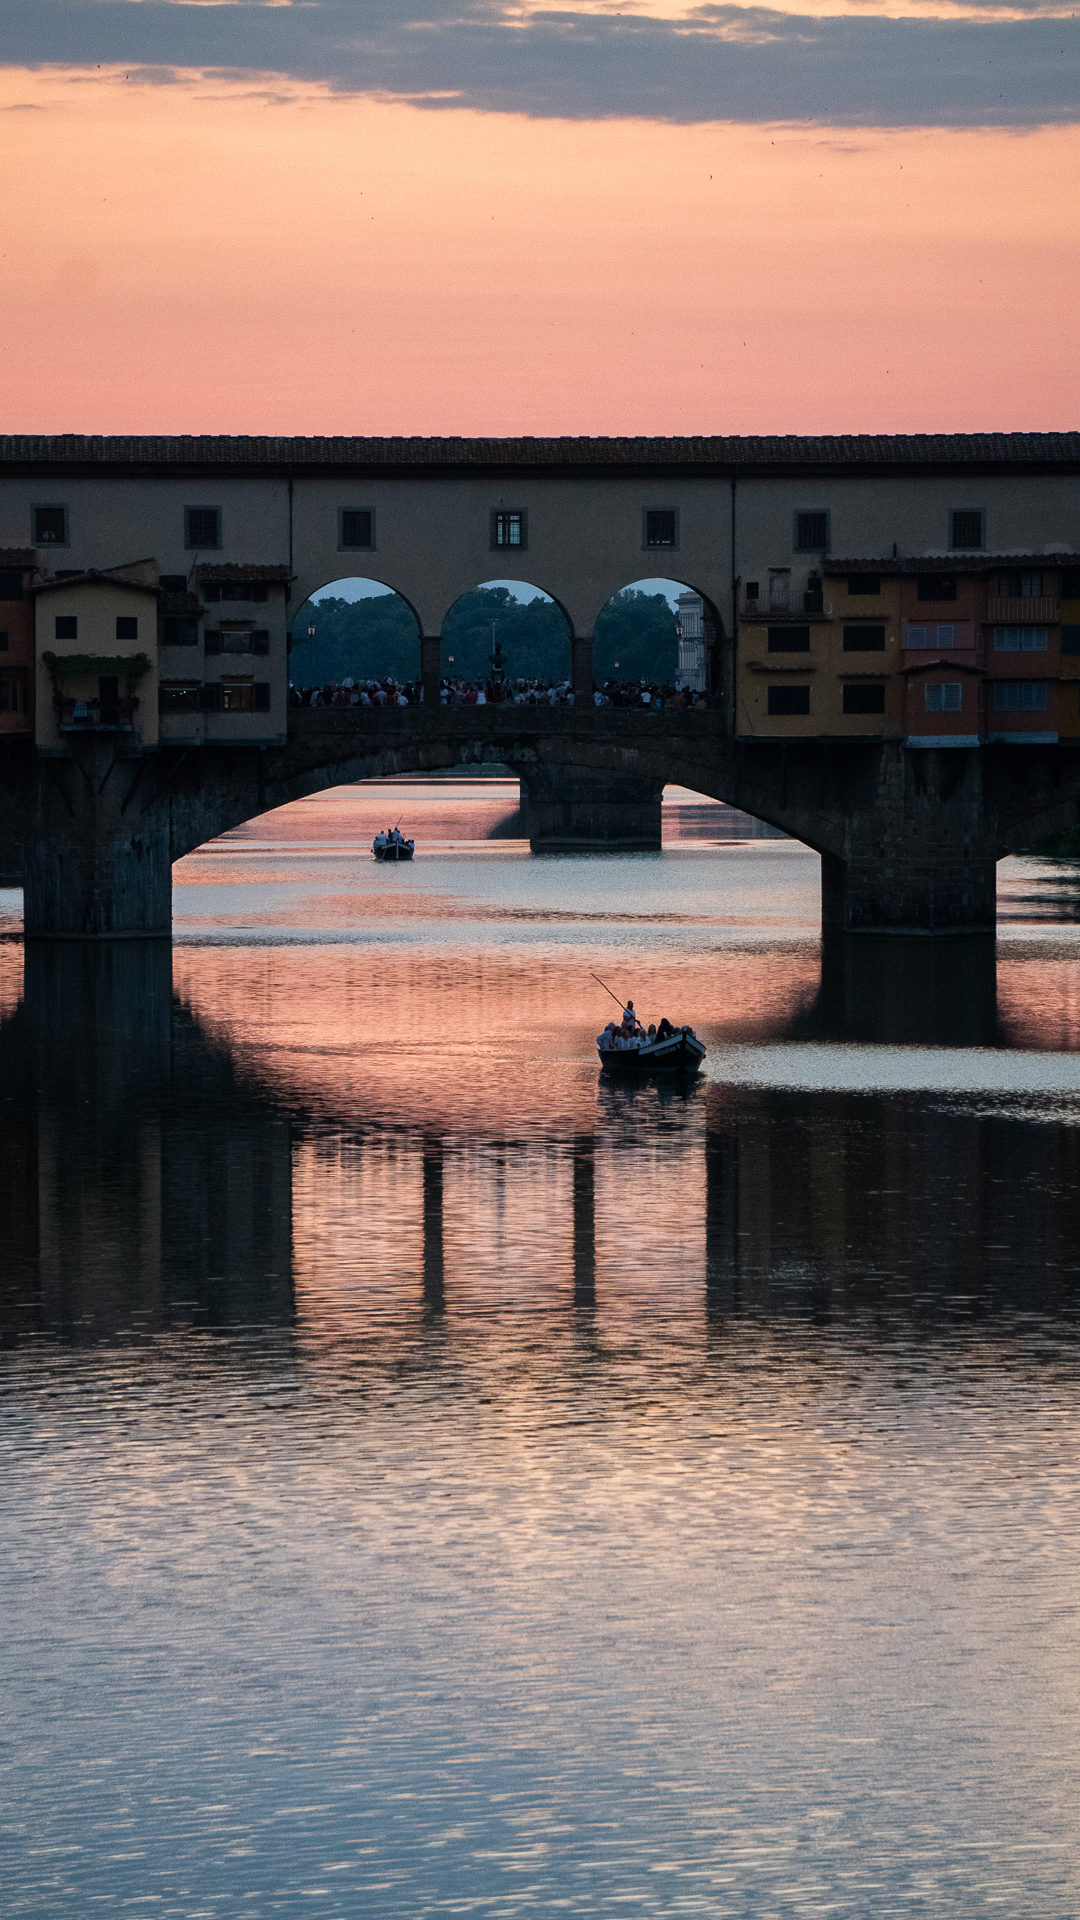

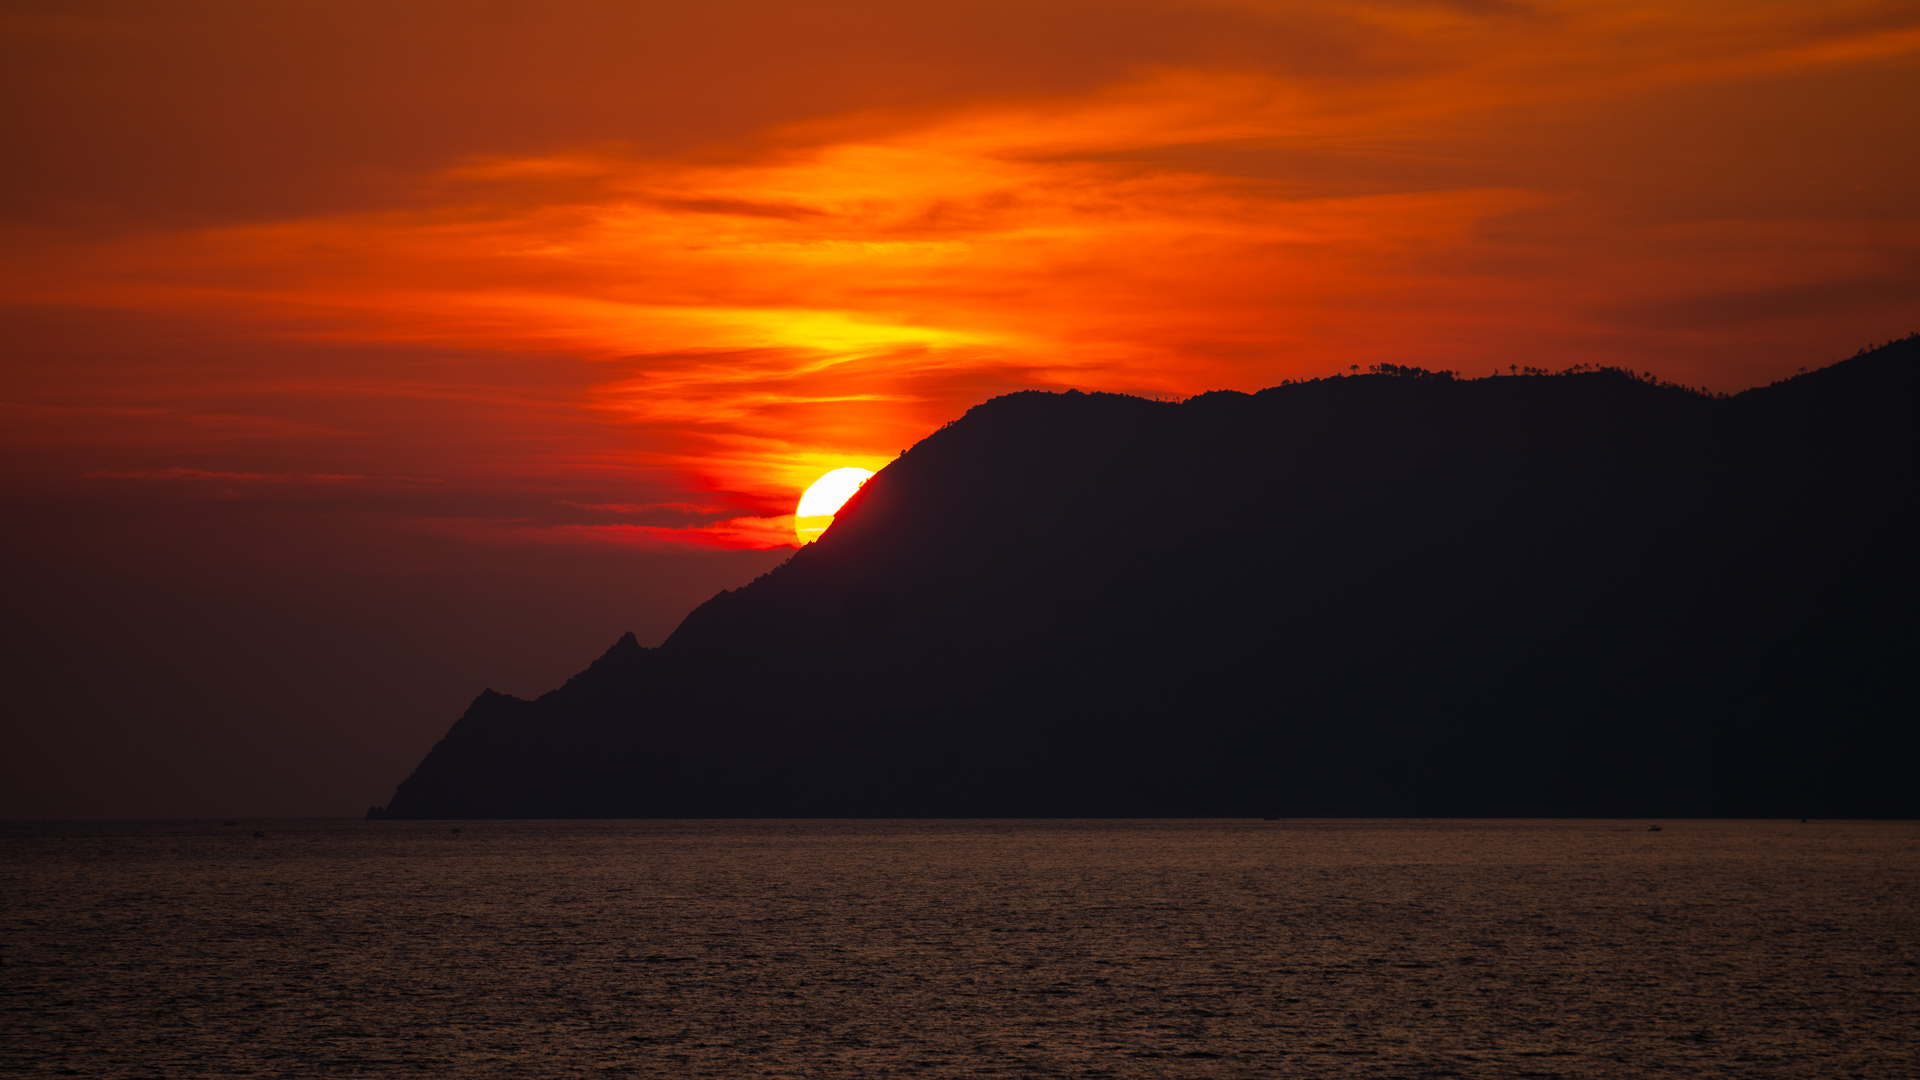

In [27]:
# display images from "Photos" section
image_urls = soup.select('div[class=column] img')
image_urls = [image['src'] for image in image_urls]
print(image_urls)
page_url = "https://keithgalli.github.io/web-scraping/"
image_urls = [page_url + image_url for image_url in image_urls]
images = [Image(image_url, height=200) for image_url in image_urls]
display(*images)

In [28]:
# mystery challenge!

# get links
link_bases = soup.find_all('h2', string=re.compile('Mystery'))[0].find_next_siblings()[1].select('a')
link_bases = [link['href'] for link in link_bases]
print(link_bases)
links = [page_url + link for link in link_bases]

secret_message = ''
for link in links:
    page = bs(requests.get(link).content)
    secret = page.find(attrs={'id': 'secret-word'}).text
    secret_message += secret + ' '
secret_message = re.sub(r"\s(?=!)", '', secret_message).rstrip()
print(secret_message)

['challenge/file_1.html', 'challenge/file_2.html', 'challenge/file_3.html', 'challenge/file_4.html', 'challenge/file_5.html', 'challenge/file_6.html', 'challenge/file_7.html', 'challenge/file_8.html', 'challenge/file_9.html', 'challenge/file_10.html']
Make sure to smash that like button and subscribe!!!


In [29]:
# video solution
files = soup.select("div.block a")
relative_files = [f['href'] for f in files]

for f in relative_files:
    full_url = page_url + f
    page = requests.get(full_url)
    bs_page = bs(page.content)
    secret_word = bs_page.find('p', attrs={'id': 'secret-word'}).string
    print(secret_word)

Make
sure
to
smash
that
like
button
and
subscribe
!!!
